## PROJECT  -- API

Nilson Roberto de Oliveira Roman

Projeto: Cadastro Único - Famílias/Pessoas por faixas de renda per capita - MI Social

Esse conjunto de dados apresenta a quantidade de famílias em situação de pobreza e extrema pobreza, o total de famílias e pessoas cadastradas no Cadastro Único, assim como o município e o ano/mês de referência.

O Cadastro Único é um instrumento que identifica e caracteriza as famílias de baixa renda, permitindo que o governo conheça melhor a realidade socioeconômica dessa população.

## Nesse conjunto de dados temos as seguintes variáveis:
    ibge: código ibge do município
    anomes: Ano/mês de referência do dado
    cadunico_tot_fam: total de família cadastradas
    cadunico_tot_pes: total de pessoas cadastradas
    cadunico_tot_fam_rpc_ate_meio_sm: total de famílias com renda per capita até meio salário mínimo
    cadunico_tot_pes_rpc_ate_meio_sm:: total de pessoas com renda per capita até meio salário mínimo
    cadunico_tot_fam_pob: total de famílias em situação de pobreza
    cadunico_tot_pes_pob: total de pessoas em situação de pobreza
    cadunico_tot_fam_ext_pob: total de famílias em situação de extrema pobreza
    cadunico_tot_pes_ext_pob: total de pessoas em situação de extrema pobreza
    cadunico_tot_fam_pob_e_ext_pob: total de famílias em situação de pobreza e de extrema pobreza
    cadunico_tot_pes_pob_e_ext_pob: total de pessoas em situação de pobreza e de extrema pobreza
    
    Situação de extrema pobreza

    Até abril de 2014: renda per capita menor igual a 70 reais
    De maio de 2014 a junho de 2016: renda per capita menor igual a 77 reais
    De julho de 2016 a maio de 2018: renda per capita menor igual a 85 reais
    De junho de 2018 em diante: renda per capita menor igual a 89 reais
    Situação de pobreza

    Até abril de 2014: renda per capita de 70,01 reais a 140 reais
    De maio de 2014 a junho de 2016: renda per capita de 77,01 reais a 154 reais
    De julho de 2016 a maio de 2018: renda per capita de 85,01 reais a 170 reais
    De junho de 2018 em diante: renda per capita de 89,01 reais a 178 reais

fonte: http://dados.gov.br/dataset/cadastro-unico-familias-pessoas-cadastradas-por-faixas-de-renda

Objetivos:

1- Verificar comportamento dos cadastros únicos de extrema pobreza durante o ano.
2- Verificar os estados com maior indice de pobreza e extrema pobreza de famílias e pessoas.
3- Total em % de famílias e pessoas em pobreza e extrema pobreza no Brasil

In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://aplicacoes.mds.gov.br/sagi/servicos/misocial?q=*&fq=anomes_s:2018*&fq=tipo_s:mes_mu&wt=json&omitHeader=true&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20asc,%20codigo_ibge%20asc'
response = requests.get(url)
response

<Response [200]>

In [3]:
results = response.json()
results

{'response': {'numFound': 66840,
  'start': 0,
  'docs': [{'anomes': '201801',
    'ibge': '110001',
    'cadunico_tot_fam': 3308,
    'cadunico_tot_pes': 10316,
    'cadunico_tot_fam_rpc_ate_meio_sm': 2688,
    'cadunico_tot_pes_rpc_ate_meio_sm': 9237,
    'cadunico_tot_fam_pob': 708,
    'cadunico_tot_pes_pob': 2576,
    'cadunico_tot_fam_ext_pob': 1156,
    'cadunico_tot_pes_ext_pob': 4026,
    'cadunico_tot_fam_pob_e_ext_pob': 1864,
    'cadunico_tot_pes_pob_e_ext_pob': 6602},
   {'anomes': '201801',
    'ibge': '110002',
    'cadunico_tot_fam': 11662,
    'cadunico_tot_pes': 32281,
    'cadunico_tot_fam_rpc_ate_meio_sm': 8660,
    'cadunico_tot_pes_rpc_ate_meio_sm': 27251,
    'cadunico_tot_fam_pob': 2694,
    'cadunico_tot_pes_pob': 9091,
    'cadunico_tot_fam_ext_pob': 2700,
    'cadunico_tot_pes_ext_pob': 8414,
    'cadunico_tot_fam_pob_e_ext_pob': 5394,
    'cadunico_tot_pes_pob_e_ext_pob': 17505},
   {'anomes': '201801',
    'ibge': '110003',
    'cadunico_tot_fam': 681,
    

In [4]:
df = json_normalize(response.json())

In [5]:
df = pd.DataFrame.from_records(df['response.docs'][0])

In [6]:
df.head()

anomes    ibge  cadunico_tot_fam  cadunico_tot_pes  \
0  201801  110001              3308             10316   
1  201801  110002             11662             32281   
2  201801  110003               681              2062   
3  201801  110004              8473             25402   
4  201801  110005              2143              5976   

   cadunico_tot_fam_rpc_ate_meio_sm  cadunico_tot_pes_rpc_ate_meio_sm  \
0                              2688                              9237   
1                              8660                             27251   
2                               517                              1730   
3                              6465                             21534   
4                              1471                              4767   

   cadunico_tot_fam_pob  cadunico_tot_pes_pob  cadunico_tot_fam_ext_pob  \
0                   708                  2576                      1156   
1                  2694                  9091                      2700   
2                   162                   579                        96   
3                  1933                  6782                      1309   
4                   360                  1231                       533   

   cadunico_tot_pes_ext_pob  cadunico_tot_fam_pob_e_ext_pob  \
0                      4026                            1864   
1                      8414                            5394   
2                       299                             258   
3                      4698                            3242   
4                      1801                             893   

   cadunico_tot_pes_pob_e_ext_pob  
0                            6602  
1                           17505  
2                             878  
3                           11480  
4                            3032

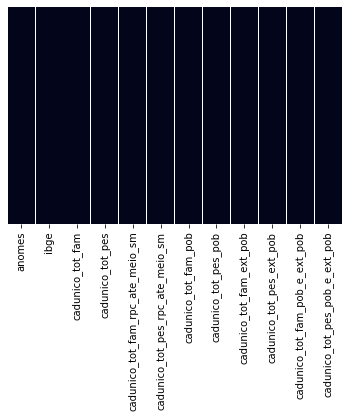

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

## Código das regiões:

fonte: http://bematechpartners.com.br/wiki/index.php/2017/08/01/tabela-de-codigo-de-uf-do-ibge-3/

In [8]:
# Criei uma lista para adicionar uma nova coluna ao DataFrame de estados para analisar por região

lst = []
for estado in df['ibge']:    
#   Região Norte do Brasil
    if int(int(estado)/10000) == 11:
        lst.append('RO')
    elif int(int(estado)/10000) == 12:
        lst.append('AC')
    elif int(int(estado)/10000) == 13:
        lst.append('AM')
    elif int(int(estado)/10000) == 14:
        lst.append('RR')
    elif int(int(estado)/10000) == 15:
        lst.append('PA')
    elif int(int(estado)/10000) == 16:
        lst.append('AP')
    elif int(int(estado)/10000) == 17:
        lst.append('TO')
        
#   Região Nordeste do Brasil
    elif int(int(estado)/10000) == 21:
        lst.append('MA')
    elif int(int(estado)/10000) == 22:
        lst.append('PI')
    elif int(int(estado)/10000) == 23:
        lst.append('CE')
    elif int(int(estado)/10000) == 24:
        lst.append('RN')
    elif int(int(estado)/10000) == 25:
        lst.append('PB')
    elif int(int(estado)/10000) == 26:
        lst.append('PE')
    elif int(int(estado)/10000) == 27:
        lst.append('AL')
    elif int(int(estado)/10000) == 28:
        lst.append('SE')
    elif int(int(estado)/10000) == 29:
        lst.append('BA')        

#   Região Sudeste
    elif int(int(estado)/10000) == 31:
        lst.append('MG')
    elif int(int(estado)/10000) == 32:
        lst.append('ES')
    elif int(int(estado)/10000) == 33:
        lst.append('RJ')
    elif int(int(estado)/10000) == 35:
        lst.append('SP')
        
#    Região Sul
    elif int(int(estado)/10000) == 41:
        lst.append('PR')
    elif int(int(estado)/10000) == 42:
        lst.append('SC')
    elif int(int(estado)/10000) == 43:
        lst.append('RS')
        
#    Região Centro-Oeste
    elif int(int(estado)/10000) == 50:
        lst.append('MS')
    elif int(int(estado)/10000) == 51:
        lst.append('MT')
    elif int(int(estado)/10000) == 52:
        lst.append('GO')
    elif int(int(estado)/10000) == 53:
        lst.append('DF')

In [9]:
df['Estados'] = lst

In [10]:
df.head(1)

anomes    ibge  cadunico_tot_fam  cadunico_tot_pes  \
0  201801  110001              3308             10316   

   cadunico_tot_fam_rpc_ate_meio_sm  cadunico_tot_pes_rpc_ate_meio_sm  \
0                              2688                              9237   

   cadunico_tot_fam_pob  cadunico_tot_pes_pob  cadunico_tot_fam_ext_pob  \
0                   708                  2576                      1156   

   cadunico_tot_pes_ext_pob  cadunico_tot_fam_pob_e_ext_pob  \
0                      4026                            1864   

   cadunico_tot_pes_pob_e_ext_pob Estados  
0                            6602      RO

In [11]:
# Pegando os nomes dos estados
estados = [nome for nome in df['Estados']]

In [12]:
estados = list(set(estados))
print(estados)

['SE', 'PB', 'RN', 'AM', 'DF', 'MT', 'PR', 'MS', 'SC', 'PE', 'BA', 'MA', 'RO', 'PA', 'AL', 'CE', 'MG', 'AP', 'TO', 'PI', 'ES', 'AC', 'RS', 'SP', 'RJ', 'RR', 'GO']


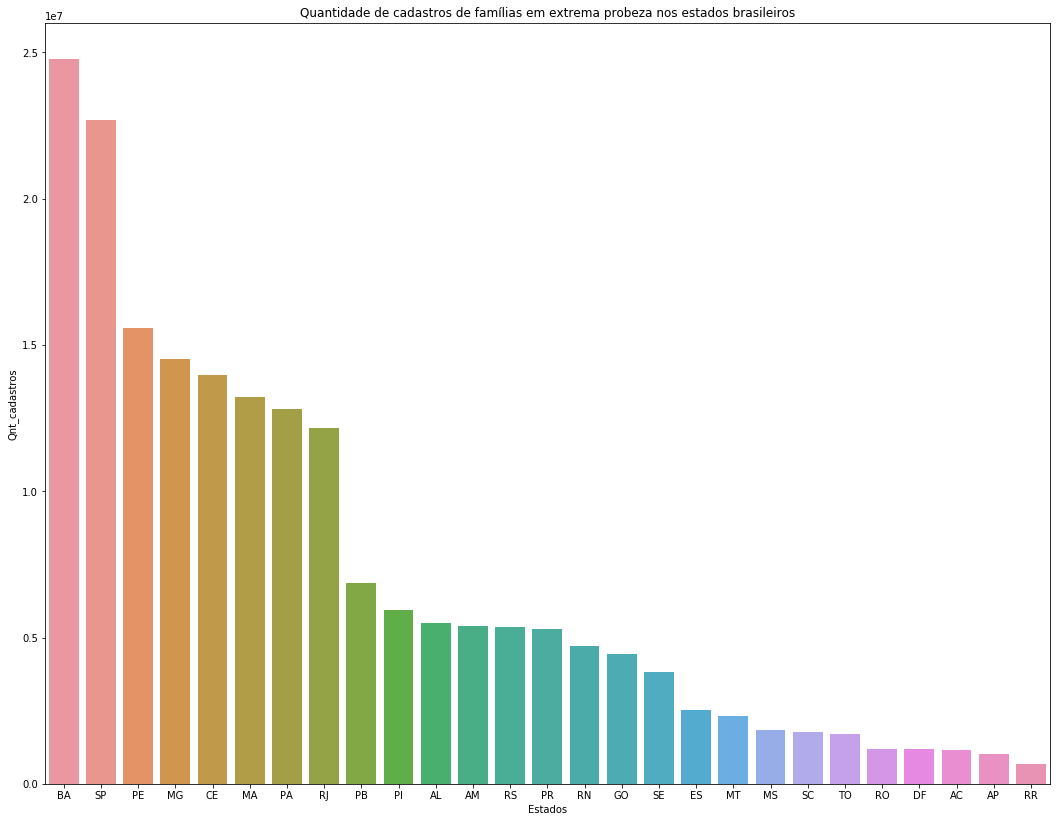

In [13]:
# Com o nome dos estados criei um novo data frama com as categorias Estados e Qunt de cadastros realizados no ano

lst_soma_pobreza = []
lst_nome_pobreza = []
lst_soma_pobreza_pessoa = []
for nome in estados:
    lst_nome_pobreza.append(nome)
    lst_soma_pobreza.append(df[df['Estados'] == nome]['cadunico_tot_fam_pob_e_ext_pob'].sum())
    lst_soma_pobreza_pessoa.append(df[df['Estados'] == nome]['cadunico_tot_pes_pob_e_ext_pob'].sum())
    
df_ex_pob = pd.DataFrame()
df_ex_pob['Estados'] = lst_nome_pobreza
df_ex_pob['Qnt_cadastros'] = lst_soma_pobreza
df_ex_pob.sort_values('Estados',inplace=True)
df_ex_pob.reset_index(inplace=True)
df_ex_pob.drop(columns='index',inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(18.0, 14.0)
plt.title('Quantidade de cadastros de famílias em extrema probeza nos estados brasileiros') 
sns.barplot(x='Estados', y='Qnt_cadastros', data=df_ex_pob.sort_values('Qnt_cadastros', ascending=False));

In [14]:
df_ex_pob

Estados  Qnt_cadastros
0       AC        1167970
1       AL        5480854
2       AM        5381097
3       AP        1005609
4       BA       24776058
5       CE       13984613
6       DF        1191822
7       ES        2523752
8       GO        4433352
9       MA       13235339
10      MG       14526960
11      MS        1855151
12      MT        2332412
13      PA       12797066
14      PB        6856724
15      PE       15570545
16      PI        5958062
17      PR        5305969
18      RJ       12177193
19      RN        4714714
20      RO        1197046
21      RR         683543
22      RS        5350609
23      SC        1760894
24      SE        3830639
25      SP       22706861
26      TO        1695558

In [15]:
# Agrupei as informações para acompanhar verificar a quantidade de cadastros por mês nos estados
df1 = df.groupby(['Estados','anomes']).sum()
df1.reset_index(inplace=True)
df1.head(5)

Estados  anomes  cadunico_tot_fam  cadunico_tot_pes  \
0      AC  201801            126613            473500   
1      AC  201802            127837            476734   
2      AC  201803            124328            465694   
3      AC  201804            125749            469331   
4      AC  201805            127222            472429   

   cadunico_tot_fam_rpc_ate_meio_sm  cadunico_tot_pes_rpc_ate_meio_sm  \
0                            116806                            457037   
1                            117704                            459712   
2                            114474                            449041   
3                            115663                            452250   
4                            116821                            454781   

   cadunico_tot_fam_pob  cadunico_tot_pes_pob  cadunico_tot_fam_ext_pob  \
0                 16489                 68191                     80225   
1                 16462                 67979                     80918   
2                 15290                 63618                     79781   
3                 15278                 63278                     80743   
4                 15225                 62835                     81737   

   cadunico_tot_pes_ext_pob  cadunico_tot_fam_pob_e_ext_pob  \
0                    321858                           96714   
1                    324035                           97380   
2                    320105                           95071   
3                    322936                           96021   
4                    325378                           96962   

   cadunico_tot_pes_pob_e_ext_pob  
0                          390049  
1                          392014  
2                          383723  
3                          386214  
4                          388213

In [16]:
# Limitei meu dataframa para apenas o cadunico de total de familias em extrema probreza
df1 = pd.DataFrame(df1[['Estados','anomes','cadunico_tot_fam_pob_e_ext_pob']].sort_values(by=['anomes',"Estados"]))
df1.reset_index(inplace=True)
df1.head()

index Estados  anomes  cadunico_tot_fam_pob_e_ext_pob
0      0      AC  201801                           96714
1     12      AL  201801                          455946
2     24      AM  201801                          442800
3     36      AP  201801                           81683
4     48      BA  201801                         2073802

In [17]:
# Função para adicionar colunas em relação ao mês passado na função
def lista_series(data,ano):
    df = data[data['anomes'] == ano]
    df = pd.DataFrame(data['cadunico_tot_fam_pob_e_ext_pob'][data['anomes'].isin([ano])])
    df.reset_index(inplace=True)
    return df['cadunico_tot_fam_pob_e_ext_pob']

In [18]:
df_ex_pob.sort_values(by='Estados',inplace=True)
df_ex_pob["1-Janeiro"] = pd.Series(lista_series(df1,'201801'))
df_ex_pob["2-Fevereiro"] = pd.Series(lista_series(df1,'201802'))
df_ex_pob["3-Março"] = pd.Series(lista_series(df1,'201803'))
df_ex_pob["4-Abril"] = pd.Series(lista_series(df1,'201804'))
df_ex_pob["5-Maio"] = pd.Series(lista_series(df1,'201805'))
df_ex_pob["6-Junho"] = pd.Series(lista_series(df1,'201806'))
df_ex_pob["7-Julho"] = pd.Series(lista_series(df1,'201807'))
df_ex_pob["8-Agosto"] = pd.Series(lista_series(df1,'201808'))
df_ex_pob["9-Setembro"] = pd.Series(lista_series(df1,'201809'))
df_ex_pob["10-Outubro"] = pd.Series(lista_series(df1,'201810'))
df_ex_pob["11-Novembro"] = pd.Series(lista_series(df1,'201811'))
df_ex_pob["12-Dezembro"] = pd.Series(lista_series(df1,'201812'))

In [19]:
df_ex_pob.head()

Estados  Qnt_cadastros  1-Janeiro  2-Fevereiro  3-Março  4-Abril   5-Maio  \
0      AC        1167970      96714        97380    95071    96021    96962   
1      AL        5480854     455946       457323   446846   450815   456796   
2      AM        5381097     442800       446095   435122   441364   448318   
3      AP        1005609      81683        82436    80946    81861    83029   
4      BA       24776058    2073802      2082844  2035074  2049411  2068156   

   6-Junho  7-Julho  8-Agosto  9-Setembro  10-Outubro  11-Novembro  \
0    97583    98596     97076       98009       98707        99178   
1   459874   464560    456947      459236      460174       462139   
2   452631   457727    449489      451966      454088       455612   
3    83997    85198     84327       85231       85303        86261   
4  2075756  2090407   2056730     2065818     2071359      2078016   

   12-Dezembro  
0        96673  
1       450198  
2       445885  
3        85337  
4      2028685

In [20]:
df_ex_pob

Estados  Qnt_cadastros  1-Janeiro  2-Fevereiro  3-Março  4-Abril   5-Maio  \
0       AC        1167970      96714        97380    95071    96021    96962   
1       AL        5480854     455946       457323   446846   450815   456796   
2       AM        5381097     442800       446095   435122   441364   448318   
3       AP        1005609      81683        82436    80946    81861    83029   
4       BA       24776058    2073802      2082844  2035074  2049411  2068156   
5       CE       13984613    1163146      1168051  1144986  1153144  1164565   
6       DF        1191822     104425       104871    97850    98296    98660   
7       ES        2523752     210024       211835   202183   204859   208656   
8       GO        4433352     376074       378913   362634   366176   371250   
9       MA       13235339    1114254      1118154  1090331  1096802  1106382   
10      MG       14526960    1222493      1229241  1186237  1198741  1214251   
11      MS        1855151     155576       156601   149048   151007   153914   
12      MT        2332412     197664       198828   189001   190876   193867   
13      PA       12797066    1061737      1066598  1041417  1051196  1064043   
14      PB        6856724     573709       576027   562659   567345   572953   
15      PE       15570545    1296084      1301177  1273806  1284139  1297616   
16      PI        5958062     497353       499935   488710   492562   497482   
17      PR        5305969     443724       447703   430044   435220   441137   
18      RJ       12177193     994622      1004610   967866   983867  1005253   
19      RN        4714714     390396       391924   383940   387936   392643   
20      RO        1197046     104088       104527    97331    98328   100005   
21      RR         683543      56266        56756    54617    55325    56116   
22      RS        5350609     453290       457140   432914   438612   445612   
23      SC        1760894     147476       148648   140707   143064   145789   
24      SE        3830639     315235       316969   310759   314717   319243   
25      SP       22706861    1886743      1904930  1822515  1848396  1884827   
26      TO        1695558     143873       144296   139674   140327   141681   

    6-Junho  7-Julho  8-Agosto  9-Setembro  10-Outubro  11-Novembro  \
0     97583    98596     97076       98009       98707        99178   
1    459874   464560    456947      459236      460174       462139   
2    452631   457727    449489      451966      454088       455612   
3     83997    85198     84327       85231       85303        86261   
4   2075756  2090407   2056730     2065818     2071359      2078016   
5   1170085  1181783   1165161     1170645     1172290      1176600   
6     99515   101749     98022       98899       98648        99316   
7    211375   216920    211072      213193      212833       214287   
8    373249   380824    367396      369875      366898       368050   
9   1111214  1119079   1097027     1100332     1102708      1105034   
10  1218787  1238646   1208053     1214408     1210129      1213302   
11   155805   160164    154894      156151      155335       156199   
12   195288   200112    194125      195815      194568       195216   
13  1071489  1083298   1064253     1070474     1075596      1082785   
14   575512   579203    568097      570856      573143       574821   
15  1303908  1314347   1293460     1301193     1308076      1313188   
16   499395   502407    494606      496553      498324       500296   
17   443243   455510    443666      447581      443945       445749   
18  1017650  1036245   1016508     1031102     1044304      1054582   
19   395344   399651    393515      395607      396217       397973   
20   100813   103506     99013       99364       98068        98293   
21    56906    58323     57227       57708       57863        58876   
22   449061   458534    443738      447378      446638       449462   
23   147190   151617    147164      148928      148513    

In [21]:
col_names = [col for col in df_ex_pob.columns]

In [22]:
# Criando um dicionário para adicionar uma nova linha ao dataframe com o total de cadastros por mês
dic = {name: df_ex_pob[name].sum() if name !='Estados' else "TOTAL" for name in col_names }
dic

{'Estados': 'TOTAL',
 'Qnt_cadastros': 192500412,
 '1-Janeiro': 16059197,
 '2-Fevereiro': 16153812,
 '3-Março': 15662288,
 '4-Abril': 15820407,
 '5-Maio': 16029206,
 '6-Junho': 16132031,
 '7-Julho': 16351559,
 '8-Agosto': 16017366,
 '9-Setembro': 16125949,
 '10-Outubro': 16159153,
 '11-Novembro': 16232201,
 '12-Dezembro': 15757243}

In [23]:
df_ex_pob = df_ex_pob.append(dic,ignore_index=True)

In [24]:
df_ex_pob

Estados  Qnt_cadastros  1-Janeiro  2-Fevereiro   3-Março   4-Abril  \
0       AC        1167970      96714        97380     95071     96021   
1       AL        5480854     455946       457323    446846    450815   
2       AM        5381097     442800       446095    435122    441364   
3       AP        1005609      81683        82436     80946     81861   
4       BA       24776058    2073802      2082844   2035074   2049411   
5       CE       13984613    1163146      1168051   1144986   1153144   
6       DF        1191822     104425       104871     97850     98296   
7       ES        2523752     210024       211835    202183    204859   
8       GO        4433352     376074       378913    362634    366176   
9       MA       13235339    1114254      1118154   1090331   1096802   
10      MG       14526960    1222493      1229241   1186237   1198741   
11      MS        1855151     155576       156601    149048    151007   
12      MT        2332412     197664       198828    189001    190876   
13      PA       12797066    1061737      1066598   1041417   1051196   
14      PB        6856724     573709       576027    562659    567345   
15      PE       15570545    1296084      1301177   1273806   1284139   
16      PI        5958062     497353       499935    488710    492562   
17      PR        5305969     443724       447703    430044    435220   
18      RJ       12177193     994622      1004610    967866    983867   
19      RN        4714714     390396       391924    383940    387936   
20      RO        1197046     104088       104527     97331     98328   
21      RR         683543      56266        56756     54617     55325   
22      RS        5350609     453290       457140    432914    438612   
23      SC        1760894     147476       148648    140707    143064   
24      SE        3830639     315235       316969    310759    314717   
25      SP       22706861    1886743      1904930   1822515   1848396   
26      TO        1695558     143873       144296    139674    140327   
27   TOTAL      192500412   16059197     16153812  15662288  15820407   

      5-Maio   6-Junho   7-Julho  8-Agosto  9-Setembro  10-Outubro  \
0      96962     97583     98596     97076       98009       98707   
1     456796    459874    464560    456947      459236      460174   
2     448318    452631    457727    449489      451966      454088   
3      83029     83997     85198     84327       85231       85303   
4    2068156   2075756   2090407   2056730     2065818     2071359   
5    1164565   1170085   1181783   1165161     1170645     1172290   
6      98660     99515    101749     98022       98899       98648   
7     208656    211375    216920    211072      213193      212833   
8     371250    373249    380824    367396      369875      366898   
9    1106382   1111214   1119079   1097027     1100332     1102708   
10   1214251   1218787   1238646   1208053     1214408     1210129   
11    153914    155805    160164    154894      156151      155335   
12    193867    195288    200112    194125      195815      194568   
13   1064043   1071489   1083298   1064253     1070474     1075596   
14    572953    575512    579203    568097      570856      573143   
15   1297616   1303908   1314347   1293460     1301193     1308076   
16    497482    499395    502407    494606      496553      498324   
17    441137    443243    455510    443666      447581      443945   
18   1005253   1017650   1036245   1016508     1031102     1044304   
19    392643    395344    399651    393515      395607      396217   
20    100005    100813    103506     99013       99364       98068   
21     56116     56906     58323     57227       57708       57863   
22    445612    449061    458534    443738      447378      446638   
23    145789    147190    151617    147164      148928      148513   
24    319243    321294    323877    319996      322099      323487   
25   1884827   1902839   1944631   1894973     1916085     192170

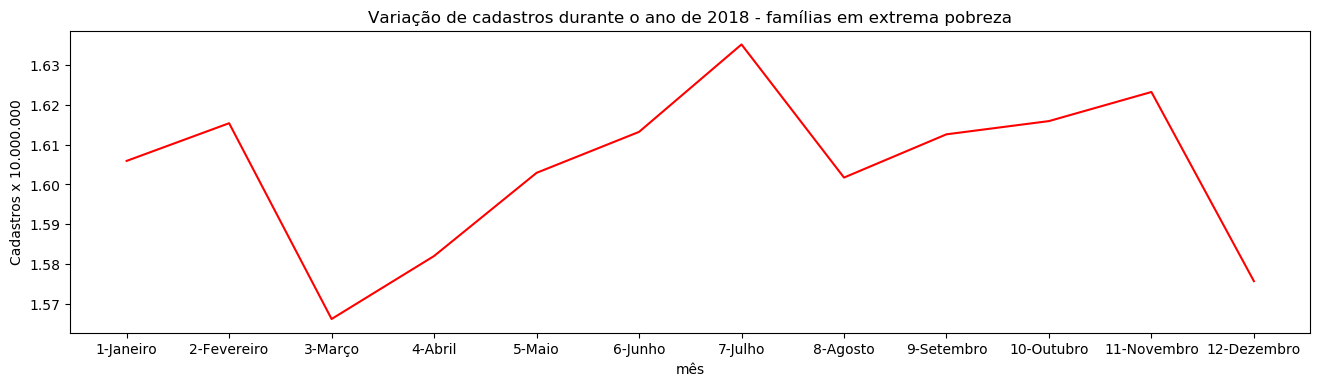

In [25]:
y = (df_ex_pob.loc[27][2:].astype('float64').values) / 10000000
x = df_ex_pob.loc[27][2:].keys()

plt.figure(figsize=(16,4), dpi=100)
plt.plot(x, y, 'r')
plt.xlabel('mês')
plt.ylabel('Cadastros x 10.000.000')
plt.title('Variação de cadastros durante o ano de 2018 - famílias em extrema pobreza')
plt.show()

In [26]:
# Adicionei na ordem do dataframe o total da população por estado
# Fonte: https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=notas-tecnicas
pop = pd.Series([869265,3322820,4080611,829494,14812617,9075649,2974703,
                3972388,6921161,7035055,21040662,2748023,3441998,8513497,
                3996496,9496294,3264531,11348937,17159960,3479010,1757589,
                576568,11329605,7075494,2278308,45538936,1555229,208494900])

df_rel = pd.DataFrame(df_ex_pob[['Estados','12-Dezembro']])
df_rel['pop_total'] = pop
df_rel.loc[:14]

Estados  12-Dezembro  pop_total
0       AC        96673     869265
1       AL       450198    3322820
2       AM       445885    4080611
3       AP        85337     829494
4       BA      2028685   14812617
5       CE      1154157    9075649
6       DF        91571    2974703
7       ES       206515    3972388
8       GO       352013    6921161
9       MA      1074022    7035055
10      MG      1172672   21040662
11      MS       150457    2748023
12      MT       187052    3441998
13      PA      1064180    8513497
14      PB       562399    3996496

In [27]:
df_rel.loc[15:27]

Estados  12-Dezembro  pop_total
15      PE      1283551    9496294
16      PI       490439    3264531
17      PR       428447   11348937
18      RJ      1020584   17159960
19      RN       389568    3479010
20      RO        93710    1757589
21      RR        57560     576568
22      RS       428230   11329605
23      SC       142167    7075494
24      SE       318155    2278308
25      SP      1846757   45538936
26      TO       136259    1555229
27   TOTAL     15757243  208494900

In [28]:
df_rel.sort_values(['12-Dezembro'],ascending=False,inplace=True)

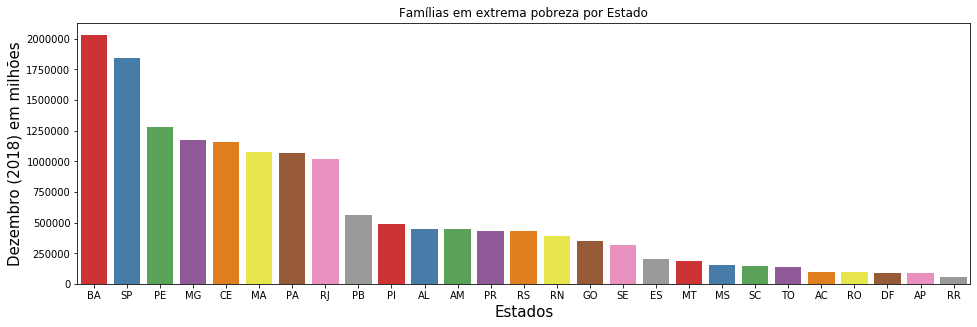

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4.8)
plt.title('Famílias em extrema pobreza por Estado') 
sns.barplot(x=df_rel['Estados'][1:], y=df_rel['12-Dezembro'][1:],palette="Set1")
ax.set_xlabel("Estados", fontsize=15)
ax.set_ylabel("Dezembro (2018) em milhões", fontsize=15);

In [30]:
# Relação de pobreza pelo total da população
df_rel['rel_pop'] = pd.Series((df_rel['12-Dezembro']/df_rel['pop_total']) * 100)
df_rel.sort_values(['rel_pop'],ascending=False,inplace=True)

In [31]:
x = df_rel.copy()
x.drop(index=27, inplace=True)

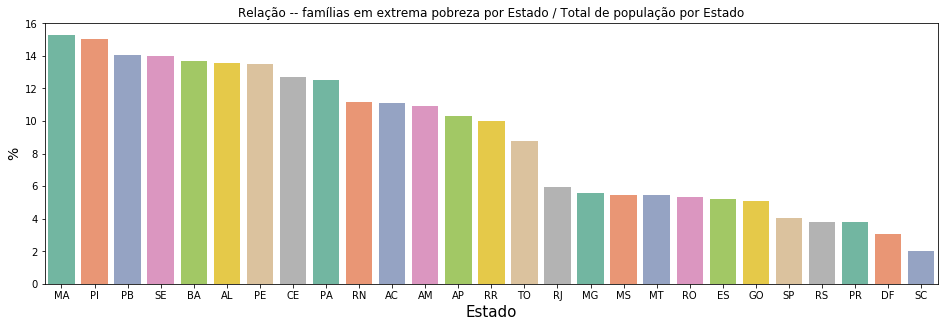

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4.8)
plt.title('Relação -- famílias em extrema pobreza por Estado / Total de população por Estado') 
sns.barplot(x=x['Estados'], y=x['rel_pop'], palette='Set2')
ax.set_xlabel("Estado", fontsize=15)
ax.set_ylabel("%", fontsize=14);

In [33]:
# Csv parte 1 --> Extrema pobreza
df_ex_pob

Estados  Qnt_cadastros  1-Janeiro  2-Fevereiro   3-Março   4-Abril  \
0       AC        1167970      96714        97380     95071     96021   
1       AL        5480854     455946       457323    446846    450815   
2       AM        5381097     442800       446095    435122    441364   
3       AP        1005609      81683        82436     80946     81861   
4       BA       24776058    2073802      2082844   2035074   2049411   
5       CE       13984613    1163146      1168051   1144986   1153144   
6       DF        1191822     104425       104871     97850     98296   
7       ES        2523752     210024       211835    202183    204859   
8       GO        4433352     376074       378913    362634    366176   
9       MA       13235339    1114254      1118154   1090331   1096802   
10      MG       14526960    1222493      1229241   1186237   1198741   
11      MS        1855151     155576       156601    149048    151007   
12      MT        2332412     197664       198828    189001    190876   
13      PA       12797066    1061737      1066598   1041417   1051196   
14      PB        6856724     573709       576027    562659    567345   
15      PE       15570545    1296084      1301177   1273806   1284139   
16      PI        5958062     497353       499935    488710    492562   
17      PR        5305969     443724       447703    430044    435220   
18      RJ       12177193     994622      1004610    967866    983867   
19      RN        4714714     390396       391924    383940    387936   
20      RO        1197046     104088       104527     97331     98328   
21      RR         683543      56266        56756     54617     55325   
22      RS        5350609     453290       457140    432914    438612   
23      SC        1760894     147476       148648    140707    143064   
24      SE        3830639     315235       316969    310759    314717   
25      SP       22706861    1886743      1904930   1822515   1848396   
26      TO        1695558     143873       144296    139674    140327   
27   TOTAL      192500412   16059197     16153812  15662288  15820407   

      5-Maio   6-Junho   7-Julho  8-Agosto  9-Setembro  10-Outubro  \
0      96962     97583     98596     97076       98009       98707   
1     456796    459874    464560    456947      459236      460174   
2     448318    452631    457727    449489      451966      454088   
3      83029     83997     85198     84327       85231       85303   
4    2068156   2075756   2090407   2056730     2065818     2071359   
5    1164565   1170085   1181783   1165161     1170645     1172290   
6      98660     99515    101749     98022       98899       98648   
7     208656    211375    216920    211072      213193      212833   
8     371250    373249    380824    367396      369875      366898   
9    1106382   1111214   1119079   1097027     1100332     1102708   
10   1214251   1218787   1238646   1208053     1214408     1210129   
11    153914    155805    160164    154894      156151      155335   
12    193867    195288    200112    194125      195815      194568   
13   1064043   1071489   1083298   1064253     1070474     1075596   
14    572953    575512    579203    568097      570856      573143   
15   1297616   1303908   1314347   1293460     1301193     1308076   
16    497482    499395    502407    494606      496553      498324   
17    441137    443243    455510    443666      447581      443945   
18   1005253   1017650   1036245   1016508     1031102     1044304   
19    392643    395344    399651    393515      395607      396217   
20    100005    100813    103506     99013       99364       98068   
21     56116     56906     58323     57227       57708       57863   
22    445612    449061    458534    443738      447378      446638   
23    145789    147190    151617    147164      148928      148513   
24    319243    321294    323877    319996      322099      323487   
25   1884827   1902839   1944631   1894973     1916085     192170

## API Parte 2

In [34]:
# Agora utilizando pessoas em extrema  pobreza no Brasil --> parte 2
df2 = df.groupby(['Estados','anomes']).sum()
df2.reset_index(inplace=True)
df2 = pd.DataFrame(df2[['Estados','anomes','cadunico_tot_pes_pob_e_ext_pob']].sort_values(by=['anomes',"Estados"]))
df2.reset_index(inplace=True)

In [35]:
df_ex_pob_pes = pd.DataFrame()
df_ex_pob_pes['Estados'] = lst_nome_pobreza
df_ex_pob_pes['Qnt_cadastros'] = lst_soma_pobreza_pessoa
df_ex_pob_pes.sort_values('Estados',inplace=True)
df_ex_pob_pes.reset_index(inplace=True)
df_ex_pob_pes.drop(columns='index',inplace=True)

In [36]:
def lista_series(data,ano):
    df = data[data['anomes'] == ano]
    df = pd.DataFrame(data['cadunico_tot_pes_pob_e_ext_pob'][data['anomes'].isin([ano])])
    df.reset_index(inplace=True)
    return df['cadunico_tot_pes_pob_e_ext_pob']

df_ex_pob_pes.sort_values(by='Estados',inplace=True)
df_ex_pob_pes["1-Janeiro"] = pd.Series(lista_series(df2,'201801'))
df_ex_pob_pes["2-Fevereiro"] = pd.Series(lista_series(df2,'201802'))
df_ex_pob_pes["3-Março"] = pd.Series(lista_series(df2,'201803'))
df_ex_pob_pes["4-Abril"] = pd.Series(lista_series(df2,'201804'))
df_ex_pob_pes["5-Maio"] = pd.Series(lista_series(df2,'201805'))
df_ex_pob_pes["6-Junho"] = pd.Series(lista_series(df2,'201806'))
df_ex_pob_pes["7-Julho"] = pd.Series(lista_series(df2,'201807'))
df_ex_pob_pes["8-Agosto"] = pd.Series(lista_series(df2,'201808'))
df_ex_pob_pes["9-Setembro"] = pd.Series(lista_series(df2,'201809'))
df_ex_pob_pes["10-Outubro"] = pd.Series(lista_series(df2,'201810'))
df_ex_pob_pes["11-Novembro"] = pd.Series(lista_series(df2,'201811'))
df_ex_pob_pes["12-Dezembro"] = pd.Series(lista_series(df2,'201812'))

In [37]:
dic = {name: df_ex_pob_pes[name].sum() if name !='Estados' else "TOTAL" for name in col_names }
df_ex_pob_pes = df_ex_pob_pes.append(dic,ignore_index=True)

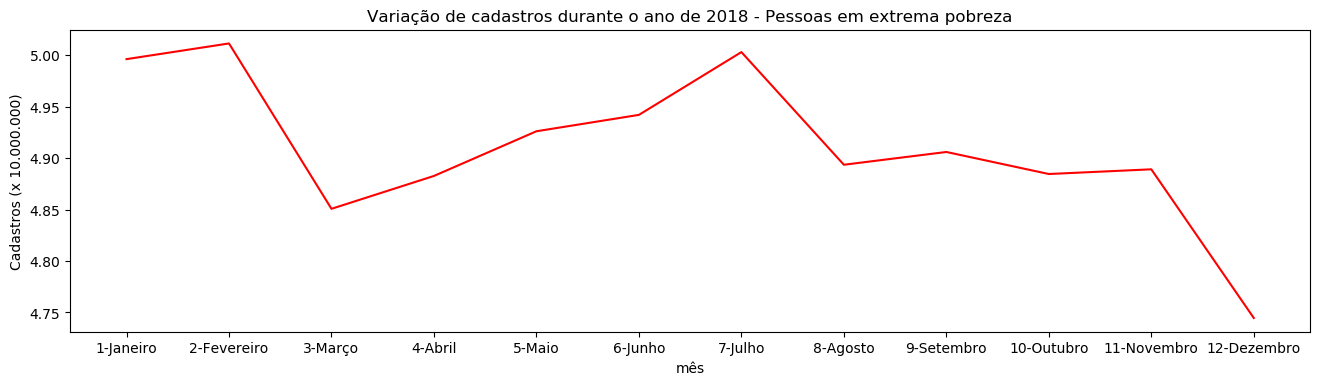

In [38]:
y1 = (df_ex_pob_pes.loc[27][2:].astype('float64').values) / 10000000
x1 = df_ex_pob_pes.loc[27][2:].keys()

plt.figure(figsize=(16,4), dpi=100)
plt.plot(x1, y1, 'r')
plt.xlabel('mês')
plt.ylabel('Cadastros (x 10.000.000)')
plt.title('Variação de cadastros durante o ano de 2018 - Pessoas em extrema pobreza')
plt.show()

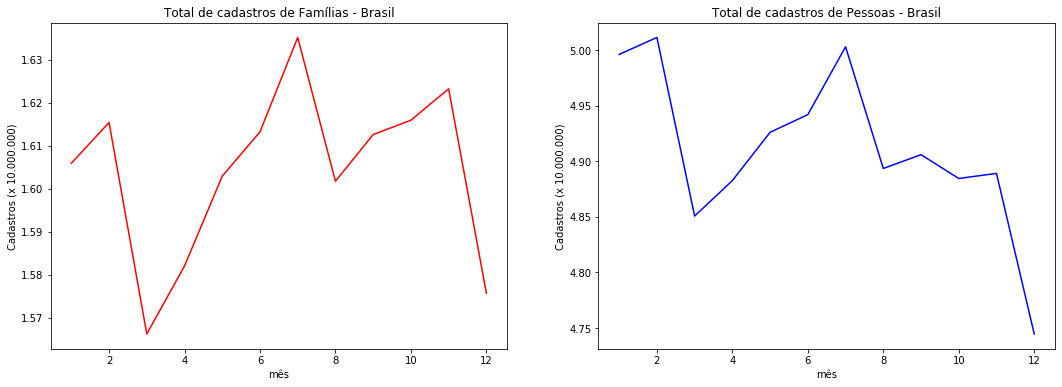

In [39]:
fig, axes = plt.subplots(figsize=(18,6),nrows=1, ncols=2)

eixo_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# for ax in axes:
axes[0].plot(eixo_x, y, 'r')
axes[0].set_xlabel('mês')
axes[0].set_ylabel('Cadastros (x 10.000.000)')
axes[0].set_title('Total de cadastros de Famílias - Brasil')

axes[1].plot(eixo_x, y1, 'b')
axes[1].set_xlabel('mês')
axes[1].set_ylabel('Cadastros (x 10.000.000)')
axes[1].set_title('Total de cadastros de Pessoas - Brasil');

In [40]:
df1_rel = pd.DataFrame(df_ex_pob_pes[['Estados','12-Dezembro']])
df1_rel['pop_total'] = pop
df1_rel.sort_values(['12-Dezembro'],ascending=False,inplace=True)

In [41]:
df_rel.loc[27]['pop_total']

208494900

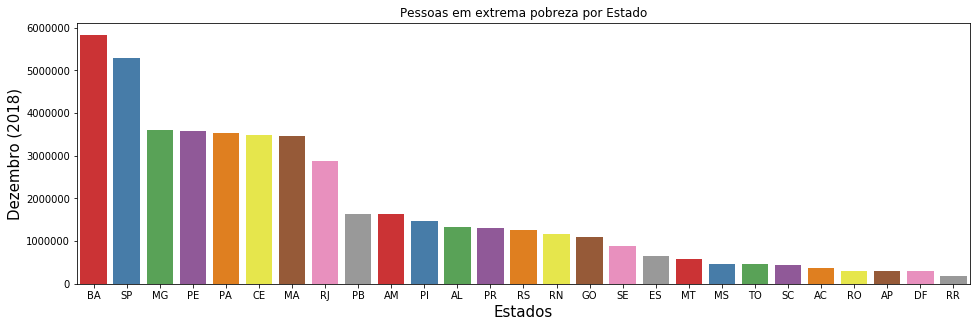

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4.8)
plt.title('Pessoas em extrema pobreza por Estado') 
sns.barplot(x=df1_rel['Estados'][1:], y=df1_rel['12-Dezembro'][1:],palette="Set1")
ax.set_xlabel("Estados", fontsize=15)
ax.set_ylabel("Dezembro (2018)", fontsize=15);

In [43]:
df1_rel['rel_pop'] = pd.Series((df1_rel['12-Dezembro']/df_rel['pop_total']) * 100)
df1_rel.sort_values(['rel_pop'],ascending=False,inplace=True)
x = df1_rel.copy()

In [44]:
x.drop(index=27,inplace=True)

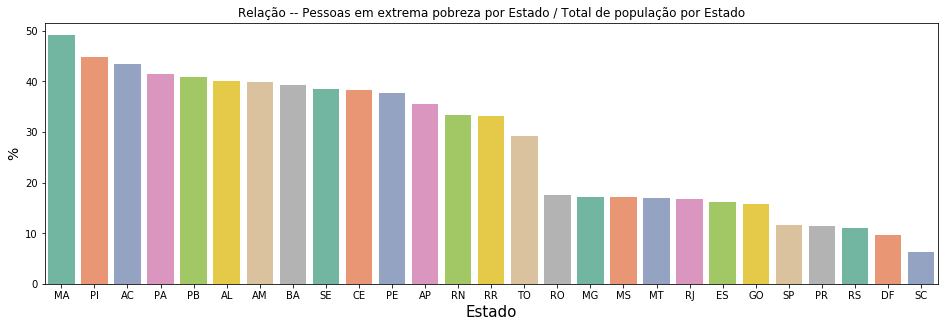

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4.8)
plt.title('Relação -- Pessoas em extrema pobreza por Estado / Total de população por Estado') 
sns.barplot(x=x['Estados'], y=x['rel_pop'],palette="Set2")
ax.set_xlabel("Estado", fontsize=15)
ax.set_ylabel("%", fontsize=14);

In [46]:
# Csv parte 2
df_ex_pob_pes

Estados  Qnt_cadastros  1-Janeiro  2-Fevereiro   3-Março   4-Abril  \
0       AC        4650173     390049       392014    383723    386214   
1       AL       16527651    1403280      1402777   1366900   1372981   
2       AM       19910182    1666344      1672504   1631933   1646332   
3       AP        3536008     291788       293364    288276    290512   
4       BA       72053091    6116602      6126309   5980217   6004200   
5       CE       42785638    3614942      3619979   3541277   3556162   
6       DF        3812561     338783       339435    315363    316248   
7       ES        8013724     678413       682392    648435    654833   
8       GO       13940440    1197293      1203620   1151311   1158808   
9       MA       42990373    3642455      3648211   3572543   3585171   
10      MG       45504184    3900282      3909783   3757768   3784474   
11      MS        5886968     501638       503421    479603    483918   
12      MT        7444861     640101       641838    610790    614735   
13      PA       43147330    3624724      3632370   3553199   3573695   
14      PB       20230546    1718727      1721540   1680143   1687979   
15      PE       44149812    3737149      3741640   3656691   3673795   
16      PI       18002380    1522113      1526304   1493274   1500346   
17      PR       16382628    1396462      1404877   1343572   1354731   
18      RJ       35137272    2937061      2956452   2830883   2866374   
19      RN       14232450    1197784      1199581   1173840   1181306   
20      RO        3990875     349994       350941    327718    330036   
21      RR        2326413     194325       195669    188749    190544   
22      RS       16065233    1387615      1394679   1316973   1329013   
23      SC        5689540     486622       488770    460521    466213   
24      SE       10782958     908670       910553    889947    896068   
25      SP       66386250    5628569      5665281   5387420   5445451   
26      TO        5731682     491637       491694    476766    477347   
27   TOTAL      589311223   49963422     50115998  48507835  48827486   

      5-Maio   6-Junho   7-Julho  8-Agosto  9-Setembro  10-Outubro  \
0     388213    389272    392236    386123      387818      387887   
1    1383752   1387472   1398628   1372269     1372424     1366793   
2    1662921   1671702   1686971   1658496     1662647     1661064   
3     293568    295772    299156    295687      297328      296759   
4    6035842   6039961   6076621   5972270     5972754     5954915   
5    3577747   3582885   3614492   3556608     3558479     3541953   
6     316976    318791    326051    313073      314657      311891   
7     664101    670929    689119    669997      673720      667362   
8    1170664   1173969   1197143   1154345     1157682     1141456   
9    3604919   3612500   3631008   3566050     3564131     3556424   
10   3818544   3822040   3883071   3777297     3779693     3737351   
11    490577    494110    506836    490475      492447      486527   
12    622217    624537    638195    618372      621085      613296   
13   3600471   3613203   3645896   3585703     3592876     3589363   
14   1697598   1699876   1708462   1671447     1672354     1669773   
15   3696435   3702126   3725060   3659846     3664142     3658094   
16   1508825   1509661   1516016   1492046     1491819     1488950   
17   1367938   1370081   1407675   1367199     1372716     1350530   
18   2914198   2940029   2989655   2921902     2950233     2965716   
19   1189976   1193939   1205650   1184343     1185638     1180870   
20    334253    335795    344403    329867      330037      324068   
21    192200    193901    198172    194290      195849      194704   
22   1343817   1349624   1376098   1328404     1333045     1321565   
23    472937    476084    490163    474645      478319      472480   
24    903219    905454    910381    896076      896638      894319   
25   5529640   5566784   5686693   5523290     5565770     554210

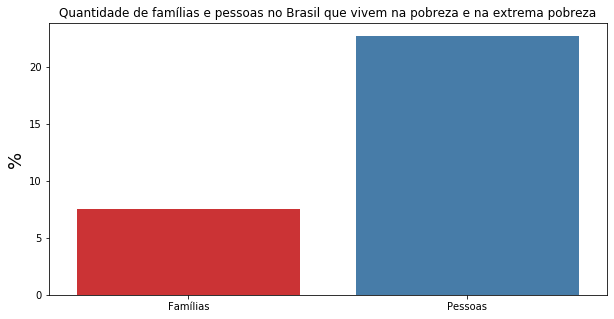

In [47]:
colunas = ["Famílias","Pessoas"]
qnt_f = (df_ex_pob.loc[27]['12-Dezembro'] / df_rel.loc[27]['pop_total']) * 100
qnt_p = (df_ex_pob_pes.loc[27]['12-Dezembro'] / df_rel.loc[27]['pop_total']) * 100
qnt = [qnt_f, qnt_p]
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Quantidade de famílias e pessoas no Brasil que vivem na pobreza e na extrema pobreza') 
sns.barplot(y=qnt, x=colunas,palette="Set1")
ax.set_ylabel("%", fontsize=18);

## PROJECT -- Web

Nilson Roberto de Oliveira Roman

Top 100 séries do site IMDB

fonte: https://www.imdb.com/list/ls057886464/

1- Descobrir o gênero mais popular.

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [49]:
url = 'https://www.imdb.com/list/ls057886464/'
response = requests.get(url)

response

<Response [200]>

In [50]:
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///list/ls057886464?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 100 - TV series - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb

In [51]:
# Localizada a tag com as informações para extração 
url_content = soup.find_all('div',{'class': 'lister-item mode-detail'})
url_content

[<div class="lister-item mode-detail">
 <div class="lister-item-image ribbonize" data-tconst="tt0903747">
 <a href="/title/tt0903747/"> <img alt="Breaking Bad" class="loadlate" data-tconst="tt0903747" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMjhiMzgxZTctNDc1Ni00OTIxLTlhMTYtZTA3ZWFkODRkNmE2XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY209_CR5,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="140"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0903747/">Breaking Bad</a>
 <span class="lister-item-year text-muted unbold">(2008–2013)</span>
 </h3>
 <p class="text-muted text-small">
 <span class="certificate">16</span>
 <span class="ghost">|</span>
 <span class="runtime">49 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Crime, Drama, Thriller            </span>
 </p>


In [52]:
# Listando os nomes das series
names = [item.find_all('img')[0].get('alt') for item in url_content]
names

['Breaking Bad',
 'Game of Thrones',
 'Friends',
 'Família Soprano',
 'Anos Incríveis',
 'Seinfeld',
 'House of Cards',
 'Lost',
 'Westworld',
 'Stranger Things',
 'Arquivo X',
 'Better Call Saul',
 'Narcos',
 'Demolidor',
 'Uma Família da Pesada',
 'Os Simpsons',
 'A Escuta',
 'Roma',
 'Rick e Morty',
 'Homeland',
 'Vikings',
 'O Justiceiro',
 'The Boys',
 'Os 13 Porquês',
 '24 Horas',
 'Dois Homens e Meio',
 'X-Men',
 'Fargo',
 'American Crime Story',
 'Dexter',
 'The Walking Dead',
 'MacGyver - Profissão: Perigo',
 'O Conto da Aia',
 'Sense8',
 'True Detective',
 'The Umbrella Academy',
 'Mr. Robot: Sociedade Hacker',
 'Boardwalk Empire: O Império do Contrabando',
 'Jornada nas Estrelas: A Nova Geração',
 'Scooby-Doo, Cadê Você?',
 'Prison Break',
 'Taboo',
 'Dr. House',
 'Plantão Médico',
 'Big Bang: A Teoria',
 'South Park',
 'Buffy: A Caça-Vampiros',
 'Beavis and Butt-Head',
 'Jessica Jones',
 'Big Little Lies',
 'Oz',
 'The Strain',
 'Vida de Escritório',
 'Raymond e Companhia',

In [53]:
# Pegando gênero e separando os subgeneros
# Nessa primeira etapa eu crio uma lista retirando espaços em branco e alguns \n
gen = [item.find_all('span',{'class':'genre'})[0].text.strip().split(',') for item in url_content]
gen

[['Crime', ' Drama', ' Thriller'],
 ['Action', ' Adventure', ' Drama'],
 ['Comedy', ' Romance'],
 ['Crime', ' Drama'],
 ['Comedy', ' Drama', ' Family'],
 ['Comedy'],
 ['Drama'],
 ['Adventure', ' Drama', ' Fantasy'],
 ['Drama', ' Mystery', ' Sci-Fi'],
 ['Drama', ' Fantasy', ' Horror'],
 ['Crime', ' Drama', ' Mystery'],
 ['Crime', ' Drama'],
 ['Biography', ' Crime', ' Drama'],
 ['Action', ' Crime', ' Drama'],
 ['Animation', ' Comedy'],
 ['Animation', ' Comedy'],
 ['Crime', ' Drama', ' Thriller'],
 ['Action', ' Drama', ' History'],
 ['Animation', ' Adventure', ' Comedy'],
 ['Crime', ' Drama', ' Mystery'],
 ['Action', ' Adventure', ' Drama'],
 ['Action', ' Adventure', ' Crime'],
 ['Action', ' Comedy', ' Crime'],
 ['Drama', ' Mystery'],
 ['Action', ' Crime', ' Drama'],
 ['Comedy', ' Romance'],
 ['Animation', ' Action', ' Family'],
 ['Crime', ' Drama', ' Thriller'],
 ['Biography', ' Crime', ' Drama'],
 ['Crime', ' Drama', ' Mystery'],
 ['Drama', ' Horror', ' Thriller'],
 ['Action', ' Adventu

In [54]:
# Retirandos os espaços dos generos entre os outros elementos da lista
for i in range(len(gen)):
    for j in range(len(gen[0])):
        try:
            gen[i][j] = gen[i][j].strip()
        except:
            pass
gen

[['Crime', 'Drama', 'Thriller'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy', 'Romance'],
 ['Crime', 'Drama'],
 ['Comedy', 'Drama', 'Family'],
 ['Comedy'],
 ['Drama'],
 ['Adventure', 'Drama', 'Fantasy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Drama', 'Fantasy', 'Horror'],
 ['Crime', 'Drama', 'Mystery'],
 ['Crime', 'Drama'],
 ['Biography', 'Crime', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Animation', 'Comedy'],
 ['Animation', 'Comedy'],
 ['Crime', 'Drama', 'Thriller'],
 ['Action', 'Drama', 'History'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Crime', 'Drama', 'Mystery'],
 ['Action', 'Adventure', 'Drama'],
 ['Action', 'Adventure', 'Crime'],
 ['Action', 'Comedy', 'Crime'],
 ['Drama', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Comedy', 'Romance'],
 ['Animation', 'Action', 'Family'],
 ['Crime', 'Drama', 'Thriller'],
 ['Biography', 'Crime', 'Drama'],
 ['Crime', 'Drama', 'Mystery'],
 ['Drama', 'Horror', 'Thriller'],
 ['Action', 'Adventure', 'Crime'],
 ['Drama', 'Sci-Fi', 'Thriller'],
 ['

In [55]:
# Anos das séries
anos = [item.find_all('span',{'class':'lister-item-year text-muted unbold'})[0].text for item in url_content]
anos

['(2008–2013)',
 '(2011–2019)',
 '(1994–2004)',
 '(1999–2007)',
 '(1988–1993)',
 '(1989–1998)',
 '(2013–2018)',
 '(2004–2010)',
 '(2016– )',
 '(2016– )',
 '(1993–2018)',
 '(2015– )',
 '(2015–2017)',
 '(2015–2018)',
 '(1999– )',
 '(1989– )',
 '(2002–2008)',
 '(2005–2007)',
 '(2013– )',
 '(2011–2020)',
 '(2013– )',
 '(2017–2019)',
 '(2019– )',
 '(2017– )',
 '(2001–2010)',
 '(2003–2015)',
 '(1992–1997)',
 '(2014– )',
 '(2016– )',
 '(2006–2013)',
 '(2010– )',
 '(1985–1992)',
 '(2017– )',
 '(2015–2018)',
 '(2014– )',
 '(2019– )',
 '(2015–2019)',
 '(2010–2014)',
 '(1987–1994)',
 '(1969–1970)',
 '(2005–2017)',
 '(2017– )',
 '(2004–2012)',
 '(1994–2009)',
 '(2007–2019)',
 '(1997– )',
 '(1997–2003)',
 '(1993–2011)',
 '(2015–2019)',
 '(2017–2019)',
 '(1997–2003)',
 '(2014–2017)',
 '(2005–2013)',
 '(1996–2005)',
 '(1999– )',
 '(2017–2019)',
 '(2011– )',
 '(2000–2015)',
 '(2005– )',
 '(2004–2006)',
 '(1997–2002)',
 '(1993–2004)',
 '(1998–2006)',
 '(2007–2015)',
 '(1960–1966)',
 '(2011– )',
 '(1989

In [56]:
# Separando os anos em começo e fim das séries

def anos_ini(anos):
    lst = []
    for i in range(len(anos)):
        lst.append(anos[i][1:5])
    return lst

def anos_final(anos):
    lst = []
    for i in range(len(anos)):
        lst.append(anos[i][6:10])
    return lst

ano_ini = anos_ini(anos)
ano_fim = anos_final(anos)
ano_fim

['2013',
 '2019',
 '2004',
 '2007',
 '1993',
 '1998',
 '2018',
 '2010',
 ' )',
 ' )',
 '2018',
 ' )',
 '2017',
 '2018',
 ' )',
 ' )',
 '2008',
 '2007',
 ' )',
 '2020',
 ' )',
 '2019',
 ' )',
 ' )',
 '2010',
 '2015',
 '1997',
 ' )',
 ' )',
 '2013',
 ' )',
 '1992',
 ' )',
 '2018',
 ' )',
 ' )',
 '2019',
 '2014',
 '1994',
 '1970',
 '2017',
 ' )',
 '2012',
 '2009',
 '2019',
 ' )',
 '2003',
 '2011',
 '2019',
 '2019',
 '2003',
 '2017',
 '2013',
 '2005',
 ' )',
 '2019',
 ' )',
 '2015',
 ' )',
 '2006',
 '2002',
 '2004',
 '2006',
 '2015',
 '1966',
 ' )',
 '2001',
 '2006',
 '2015',
 '2013',
 '2016',
 ' )',
 '2013',
 ' )',
 '2014',
 '2020',
 '2000',
 '2019',
 ' )',
 ' )',
 '2019',
 '2013',
 '2014',
 ' )',
 ' )',
 ' )',
 ' )',
 '2018',
 '2014',
 ' )',
 '2019',
 '1996',
 '2006',
 '1996',
 '2019',
 '2015',
 '2007',
 '1989',
 '2013',
 '2015']

In [57]:
# Votos 
votes = [item.find_all('span',{'name':'nv'})[0].text for item in url_content]
votes

['1,308,607',
 '1,638,327',
 '735,471',
 '269,497',
 '32,607',
 '236,602',
 '444,788',
 '468,928',
 '374,579',
 '706,666',
 '189,078',
 '268,795',
 '317,487',
 '342,455',
 '292,197',
 '346,044',
 '259,733',
 '146,431',
 '320,120',
 '288,029',
 '374,635',
 '163,793',
 '129,619',
 '231,546',
 '165,869',
 '231,610',
 '35,531',
 '292,349',
 '72,777',
 '615,575',
 '815,491',
 '33,796',
 '146,524',
 '129,328',
 '465,373',
 '92,437',
 '305,539',
 '164,548',
 '91,994',
 '27,903',
 '443,762',
 '107,086',
 '391,088',
 '47,578',
 '678,839',
 '315,006',
 '121,881',
 '26,329',
 '183,841',
 '131,826',
 '84,249',
 '73,019',
 '336,977',
 '60,341',
 '73,671',
 '77,588',
 '379,627',
 '74,643',
 '111,078',
 '88,971',
 '28,780',
 '69,463',
 '145,629',
 '190,208',
 '30,971',
 '261,934',
 '23,547',
 '222,632',
 '81,810',
 '203,910',
 '105,066',
 '188,752',
 '212,046',
 '367,772',
 '562,959',
 '394,874',
 '29,813',
 '203,024',
 '116,254',
 '186,724',
 '29,051',
 '211,406',
 '222,626',
 '322,288',
 '59,714',


In [58]:
data = pd.DataFrame()

In [59]:
data = pd.DataFrame.from_records([data for data in zip(names, gen, votes, ano_ini,ano_fim)])
data.columns = ["series","genero", "votos","inicio",'fim']

In [60]:
# Problema encontrado na formatação da séries 68°
data.loc[67]

series                      Heróis
genero    [Drama, Fantasy, Sci-Fi]
votos                      222,632
inicio                        II) 
fim                           2006
Name: 67, dtype: object

In [61]:
# Efetuado manualmente a correção
data.loc[67]['inicio'] = '2006'
data.loc[67]['fim'] = '2010'

In [62]:
data.loc[67]

series                      Heróis
genero    [Drama, Fantasy, Sci-Fi]
votos                      222,632
inicio                        2006
fim                           2010
Name: 67, dtype: object

In [63]:
data['fim'].replace(' )','presente', inplace=True)

In [64]:
data['fim'].replace(' )','presente', inplace=True)

In [65]:
data_gen = pd.get_dummies(data['genero'].apply(pd.Series).stack()).sum(level=0)
data_gen

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0        0          0          0          0       0      1      1       0   
1        1          1          0          0       0      0      1       0   
2        0          0          0          0       1      0      0       0   
3        0          0          0          0       0      1      1       0   
4        0          0          0          0       1      0      1       1   
..     ...        ...        ...        ...     ...    ...    ...     ...   
95       0          0          0          0       0      1      1       0   
96       1          1          0          0       0      0      1       0   
97       1          1          1          0       0      0      0       0   
98       0          0          0          0       1      0      0       0   
99       0          0          0          0       0      1      1       0   

    Fantasy  History  Horror  Music  Mystery  Romance  Sci-Fi  Thriller  
0         0        0       0      0        0        0       0         1  
1         0        0       0      0        0        0       0         0  
2         0        0       0      0        0        1       0         0  
3         0        0       0      0        0        0       0         0  
4         0        0       0      0        0        0       0         0  
..      ...      ...     ...    ...      ...      ...     ...       ...  
95        0        0       0      0        1        0       0         0  
96        0        0       0      0        0        0       0         0  
97        0        0       0      0        0        0       0         0  
98        0        0       0      0        0        0       0         0  
99        0        0       1      0        0        0       0         0  

[100 rows x 16 columns]

In [66]:
# Colocando nan para realizar a contagem certa de generos
data_gen = data_gen.replace(to_replace=0, value= np.nan)
data_gen

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0      NaN        NaN        NaN        NaN     NaN    1.0    1.0     NaN   
1      1.0        1.0        NaN        NaN     NaN    NaN    1.0     NaN   
2      NaN        NaN        NaN        NaN     1.0    NaN    NaN     NaN   
3      NaN        NaN        NaN        NaN     NaN    1.0    1.0     NaN   
4      NaN        NaN        NaN        NaN     1.0    NaN    1.0     1.0   
..     ...        ...        ...        ...     ...    ...    ...     ...   
95     NaN        NaN        NaN        NaN     NaN    1.0    1.0     NaN   
96     1.0        1.0        NaN        NaN     NaN    NaN    1.0     NaN   
97     1.0        1.0        1.0        NaN     NaN    NaN    NaN     NaN   
98     NaN        NaN        NaN        NaN     1.0    NaN    NaN     NaN   
99     NaN        NaN        NaN        NaN     NaN    1.0    1.0     NaN   

    Fantasy  History  Horror  Music  Mystery  Romance  Sci-Fi  Thriller  
0       NaN      NaN     NaN    NaN      NaN      NaN     NaN       1.0  
1       NaN      NaN     NaN    NaN      NaN      NaN     NaN       NaN  
2       NaN      NaN     NaN    NaN      NaN      1.0     NaN       NaN  
3       NaN      NaN     NaN    NaN      NaN      NaN     NaN       NaN  
4       NaN      NaN     NaN    NaN      NaN      NaN     NaN       NaN  
..      ...      ...     ...    ...      ...      ...     ...       ...  
95      NaN      NaN     NaN    NaN      1.0      NaN     NaN       NaN  
96      NaN      NaN     NaN    NaN      NaN      NaN     NaN       NaN  
97      NaN      NaN     NaN    NaN      NaN      NaN     NaN       NaN  
98      NaN      NaN     NaN    NaN      NaN      NaN     NaN       NaN  
99      NaN      NaN     1.0    NaN      NaN      NaN     NaN       NaN  

[100 rows x 16 columns]

In [69]:
data_gen.count()

Action       28
Adventure    16
Animation    13
Biography     3
Comedy       30
Crime        37
Drama        65
Family        3
Fantasy      10
History       3
Horror        8
Music         1
Mystery      18
Romance       8
Sci-Fi       10
Thriller     13
dtype: int64